<a href="https://colab.research.google.com/github/laurenzberger/Machine-Learning-Engineer-Nanodegree/blob/master/boston_housing/boston_housing.my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laurenzberger/Machine-Learning-Engineer-Nanodegree/blob/master/boston_housing/boston_housing.my.ipynb)

# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
%%bash
[ ! -d "/content/Machine-Learning-Engineer-Nanodegree" ] && git clone https://github.com/laurenzberger/Machine-Learning-Engineer-Nanodegree.git

Cloning into 'Machine-Learning-Engineer-Nanodegree'...


In [2]:
cd /content/Machine-Learning-Engineer-Nanodegree/boston_housing

/content/Machine-Learning-Engineer-Nanodegree/boston_housing


In [3]:
ls -la

total 3368
drwxr-xr-x 2 root root    4096 Feb 27 14:26 ./
drwxr-xr-x 8 root root    4096 Feb 27 14:26 ../
-rwxr-xr-x 1 root root  353432 Feb 27 14:26 boston_housing.html*
-rw-r--r-- 1 root root  159660 Feb 27 14:26 boston_housing.ipynb
-rw-r--r-- 1 root root 2885763 Feb 27 14:26 boston_housing.my.ipynb
-rwxr-xr-x 1 root root   12435 Feb 27 14:26 housing.csv*
-rwxr-xr-x 1 root root    6003 Feb 27 14:26 project_description.md*
-rwxr-xr-x 1 root root    2287 Feb 27 14:26 README.md*
-rwxr-xr-x 1 root root    5029 Feb 27 14:26 visuals.py*


In [4]:
!git pull

Already up to date.


## Explore Boston Housing Dataset

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
predictors = boston.data
target = np.array([boston.target]).T
boston_all =np.concatenate((predictors,target), axis=1)
columns = np.append([boston.feature_names],['MEDV'])
boston_df = pd.DataFrame(data=boston_all,columns=columns)

In [6]:
print boston.DESCR

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

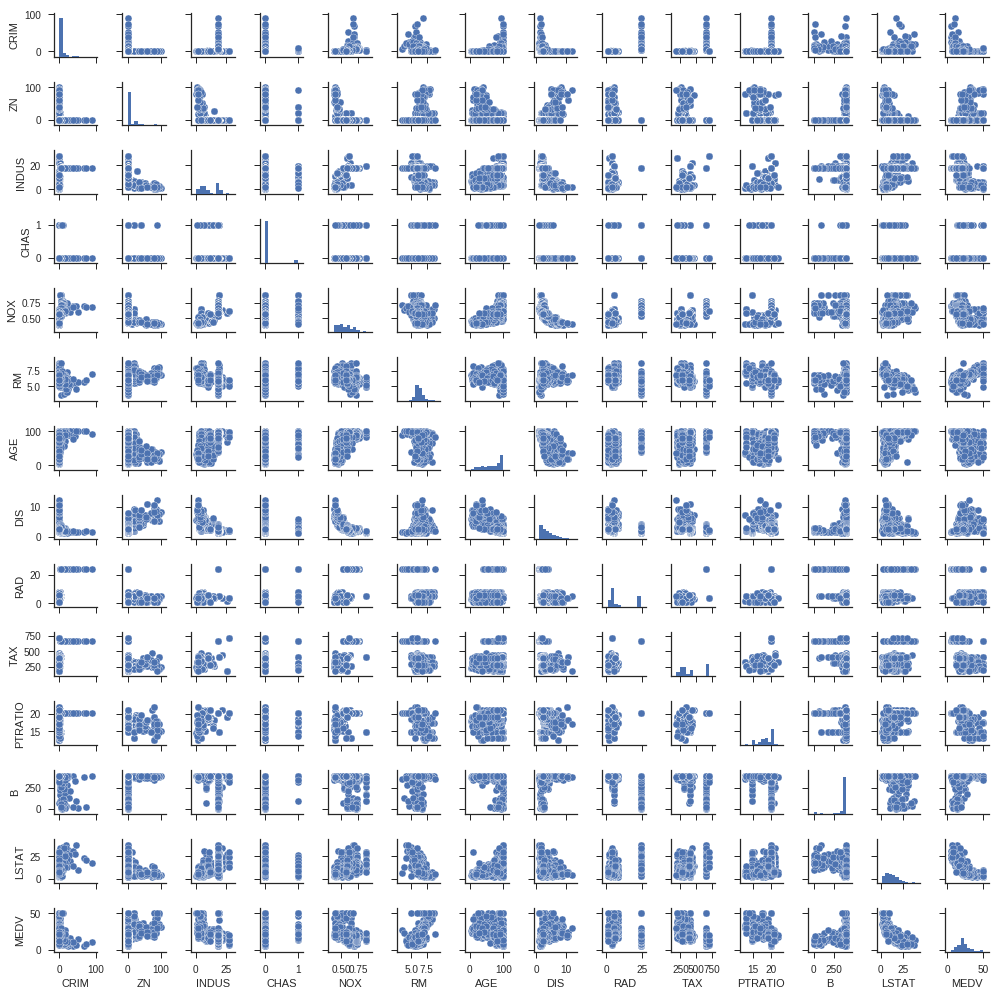

In [9]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(boston_df,size=1)

#Train several Models

### Split into Test and Training Dataset

In [0]:
from sklearn.model_selection import train_test_split
houses_train, houses_test, prices_train, prices_test = train_test_split(
    boston_df.drop(['MEDV'], axis=1),
    boston_df['MEDV'], 
    test_size=0.3, 
    random_state=13)

##Linear Regression 

In [69]:
from sklearn import linear_model

model_linear = linear_model.LinearRegression()

model_linear.fit(houses_train,prices_train)

mse_linear = mean_squared_error(model_linear.predict(houses_test),prices_test)
mse_linear

23.544966099958376

##Random Forest

# Evaluating Model Performance


In [0]:
from sklearn.metrics import mean_squared_error

##Baseline Heuristic

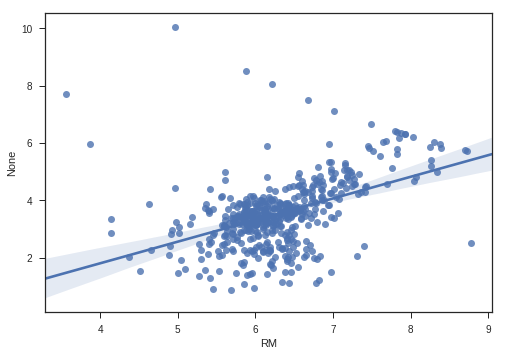

In [37]:
sns.regplot(y=boston_df['MEDV']/boston_df['RM'],x=boston_df['RM'])

Whats the average price per room in thousand dollars? 

In [45]:

price_per_room = boston_df['MEDV']/boston_df['RM']
np.median(price_per_room)

3.4713426530730955

In [64]:
np.mean(np.power(np.abs(houses_test['RM']*3.5-prices_test),2))

55.521673838815786

The simple heuristic of 3.5 thousand dollars per room price estimate gives us this mean squared error:

In [66]:
mse_baseline = mean_squared_error(houses_test['RM']*3.5,prices_test)
mse_baseline

55.521673838815786

## Linear Regression

# Statistical Analysis and Data Exploration


# Model Prediction
